## Lorenzo de Cilladi - student @ UniTo - IXPE_To
## Torino, 15 June 2017

## Attempt to understand which events cause the central and the lateral increase in TRK_PHI2 (polarization angle distribution) for real data

Looking at the polarization angle ($\varphi$) histograms for 100% polarized events both from real data and from simulations (generated with ixpesim), I noticed the presence of disturbing bumps of events in real data histograms around 0° and $\pm$180°. These bumps are not present in any of the simulations data, and they cause a deviation of the distribution from the expected $\varphi$ distribution, R($\varphi$) $\propto$ cos$^2$($\varphi$).

First of all, I tried to change the zero suppression threshold and the first and second pass moments analysis thresholds in order to see if the bump would disapper, or at least become smaller. This very first attempt was unsuccessful. No significant change happened.

Therefore, I tried to figure out whether the events of the bumps belong to a population which is different from the X-ray photons.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.table import Table

In [14]:
# READ ixperecon output file and print the columns corresponding to the first five events.

f = Table.read('/home/lorenzo/ixpeTO/tools/data/xpol_2735_recon.fits', format='fits')
df = f.to_pandas()
# df.head(5)

In [3]:
# PRINT some statistical values
# df.describe()

## 1. Bumps' events selection. $\varphi$ bins.

After looking at the complete $\varphi$ distribution, I selected five ranges of $\varphi$ in order to isolate the three regions with the bumps.
The BLUE plots show the $\varphi$ distribution:
 - 1st histogram: complete distribution (-180° < $\varphi$ < 180°). It is possible to see the bumps.
 - 2nd to 6th histograms: distribution splitted in five ranges:
    - plot 0: half bump around -180°
    - plot 2: bump around 0°
    - plot 4: half bump around 180°

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa378d4afd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa378a914d0>]], dtype=object)

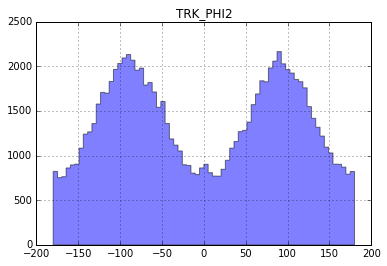

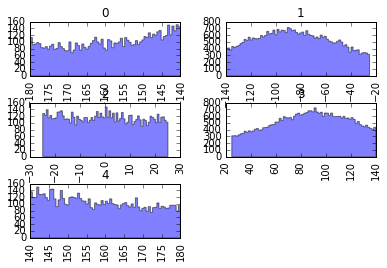

In [4]:
# TEST BIN SU PHI2
phibins = [-180., -140., -25., 25., 140., 180.]
df['phibin'] = pd.cut(df.TRK_PHI2, phibins, labels=False)
df.hist('TRK_PHI2', bins=70, histtype='stepfilled', alpha=0.5)
df.hist('TRK_PHI2', by='phibin', bins=70, histtype='stepfilled', alpha=0.5)

## 2. Separation of different populations: pulse invariant (PI) bins to $\varphi$ distribution.

Hypothesis: if the events belong to different populations with different energies (x-rays and protons? X-rays and muons?), the total pulse height (PI = pulse invariant) of their track should be significantly different:
 - low energy photons/particles $\rightarrow$ ejected (photo)electron (photoelectric effect or ionization) has low energy $\rightarrow$ few gas molecules ionized, smaller track and less total charge collected;
 - high energy photons/particles $\rightarrow$ ejected (photo)electron has high energy $\rightarrow$ more gas molecules ionized, bigger track and greater total charge collected.
 
Outcome: interesting result (1st histogram). Different population found. Further analysis to understand if the events can belong to two hypothetic different populations:
  1. low energy (2-8 keV) X-ray photons;
  2. high energy background (p, $\mu$,...).

First attempt: try to separate the pulse height distribuion according to the $\varphi$-binning (the five above mentioned regions). $\rightarrow$ No clear way to distinguish the populations using $\varphi$ regions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3787ed950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa3785bcbd0>]], dtype=object)

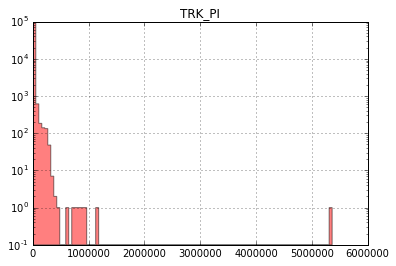

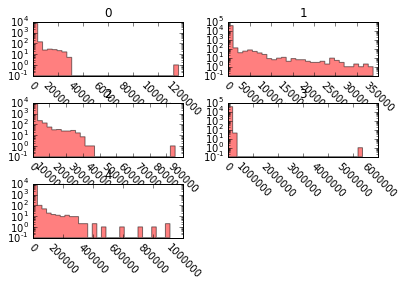

In [5]:
# TEST BIN SU PHI2
phibins = [-180., -140., -25., 25., 140., 180.] #-140, 140
df['phibin'] = pd.cut(df.TRK_PHI2, phibins, labels=False)
df.hist('TRK_PI', bins=100, log=True, histtype='stepfilled', alpha=0.5, color='r')
df.hist('TRK_PI', by='phibin', bins=30, xrot=-45., log=True, histtype='stepfilled', alpha=0.5, color='r')

## 3. Separation of different populations: pulse invariant (PI) bins to $\varphi$ distribution.

Looking at the complete track pulse height distribution (in pulse invariant, PI), three regions can be identified.

Plotting the $\varphi$ distribution of the three supposed PI populations, the resulting outcome is:
 - tracks with PI $\in$ [0, 20000] $\rightarrow$ likely polarized X-ray events: R($\varphi$) $\propto$ cos$^2$($\varphi$)
 - tracks with PI $\in$ [20000, 80000] $\rightarrow$ likely background
 - tracks with PI $\in$ [80000, 900000] $\rightarrow$ likely background

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa376ff4190>]], dtype=object)

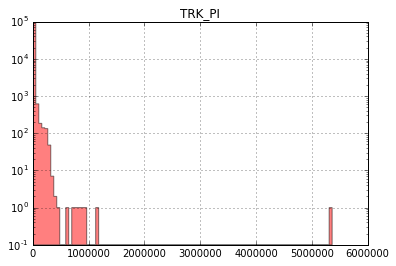

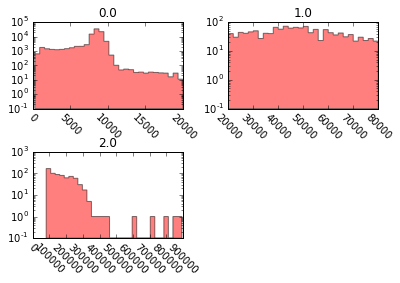

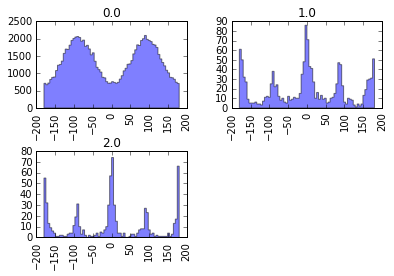

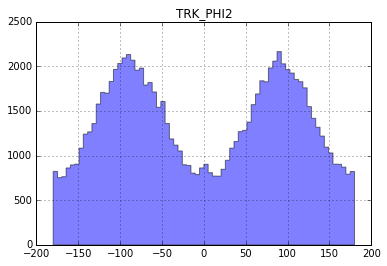

In [6]:
#TEST BIN IN PULSE INVARIANT ---> to PHI distribution

#pibins = [0, 15000, 900000]
pibins = [0, 20000, 80000, 900000]

df['pibin'] = pd.cut(df.TRK_PI, pibins, labels=False)
df.hist('TRK_PI', bins=100, log=True, histtype='stepfilled', alpha=0.5, color='r')
df.hist('TRK_PI', by='pibin', bins=30, xrot=-45., log=True, histtype='stepfilled', alpha=0.5, color='r')
df.hist('TRK_PHI2', grid=True, by='pibin', bins=70, histtype='stepfilled', alpha=0.5)
df.hist('TRK_PHI2', bins=70, histtype='stepfilled', alpha=0.5)
#df.hist('eventID', by='pibin', bins=81)



## 4. Separation of different populations: PI bins to skewness.

The shape of background events' tracks should look more cirular and symmetric. Therefore, I tried to analyse the skewness distribution of the three PI populations identified at the previous point (3).

Expected outcome: skewness peak aroud zero much sharper for background events. Polarised X-rays tracks are more elongated, and therefore the absolute value of the skewness can be greater.

(How can I get RMS???)

Result: as expected. N.B.: there seems to be:
 - a significant change (look at second region variations) when the upper edge of the first range is set at 8000 PI;
 - a change (look at second and third region variations) when the upper edge of the second range is set around 30000-50000 PI.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa377c017d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa377ae6910>]], dtype=object)

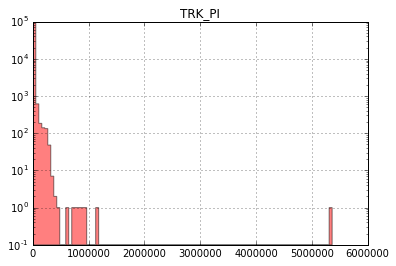

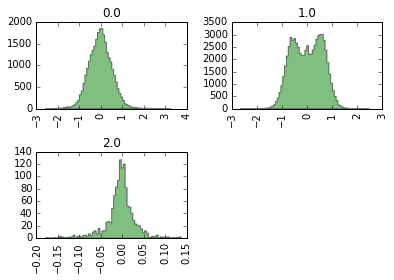

In [7]:
#TEST BIN IN PULSE INVARIANT ---> to SKEWNESS

#pibins = [0, 15000, 900000]
pibins2 = [0, 8000, 50000, 900000]
df['pibin2'] = pd.cut(df.TRK_PI, pibins2, labels=False)

df.hist('TRK_PI', bins=100, log=True, histtype='stepfilled', alpha=0.5, color='r')
df.hist('TRK_SKEW', grid=True, by='pibin2', bins=70, histtype='stepfilled', alpha=0.5, color='g')

## 5. Separation of different populations: SKEWNESS bins to $\varphi$ distribution.

From the skewness analysis (part 4), it is evident that the highest energy tracks (greatest PI region) are characterised by skewness mainly in the range [-0.05, 0.05]. Therefore, I tried to separate our events in three skewness bins:
 - (a) from the minimum skewness value to -0.05;
 - (b) from -0.05 to 0.05;
 - (c) from 0.05 to the maximum skewness value.

Expected outcome:
 - (a) polarized X-ray events;
 - (b) background events + some polarized X-ray events $\leftarrow$ in the complete skewness histogram, the bin around 0 is higher than the others: there is a suspected excess of events (background?).
 - (c) polarized X-ray events.
 
 Result: as expected.
 
 Let's apply the skewness bins to the $\varphi$ distribution histogram. It is clear that in the central bin there is a predominance of the background events (those with $\varphi$ = 0, $\pm$90°, $\pm$180°).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa37715f310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa378d3c9d0>]], dtype=object)

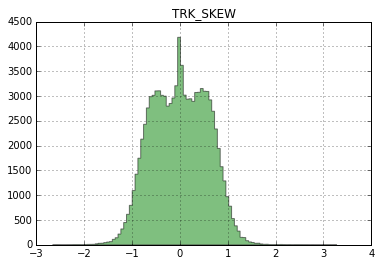

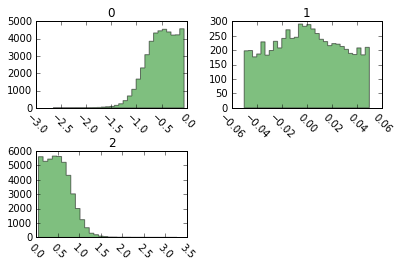

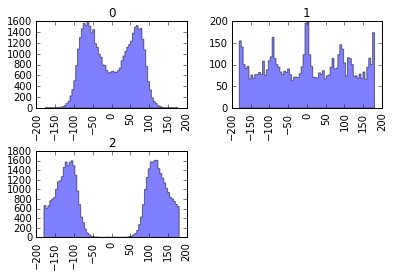

In [8]:
skewbins = [-5.,-0.05, 0.05, 5] #TODO: anziche' -5 e +5, mettere min_skew e max_skew
df['skewbin'] = pd.cut(df.TRK_SKEW, skewbins, labels=False)
df.hist('TRK_SKEW', bins=100, histtype='stepfilled', alpha=0.5, color='g') #, log=True)
df.hist('TRK_SKEW', by='skewbin', bins=30, xrot=-45., histtype='stepfilled', alpha=0.5, color='g') #, log=True)
df.hist('TRK_PHI2', grid=True, by='skewbin', bins=70, histtype='stepfilled', alpha=0.5)
#df.hist('TRK_PI', grid=True, by='skewbin', bins=70, xrot=-45., log=True, histtype='stepfilled', alpha=0.5, color='r')
#df.hist('eventID', by='skewbin', bins=81)

## 6. Separation of different populations: SKEWNESS bins to PI distribution.

If the same skewness bins are applied to the PI distribution histogram, it comes out that:
 - the events with skewness $\in$ [-0.05, 0.05] show total pulse heights up to 3$\cdot$10$^5$ PI;
 - the other events go up to (1$\div$2) $\cdot$10$^5$ PI.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa377314190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa376f5cc50>]], dtype=object)

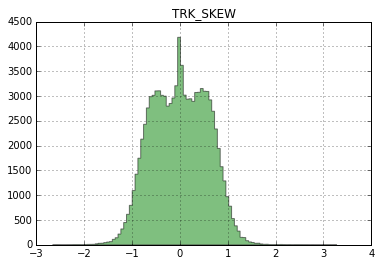

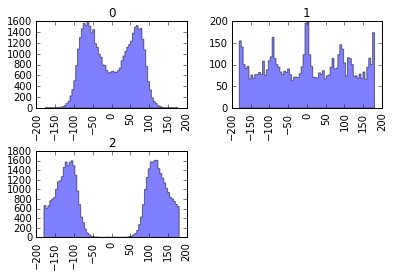

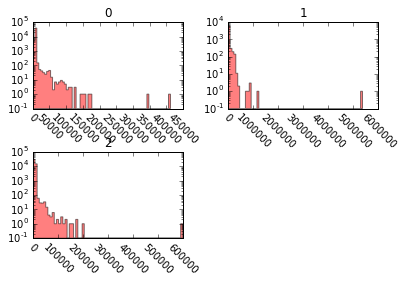

In [9]:
skewbins = [-5.,-0.05, 0.05, 5] #TODO: anziche' -5 e +5, mettere min_skew e max_skew
df['skewbin'] = pd.cut(df.TRK_SKEW, skewbins, labels=False)
df.hist('TRK_SKEW', bins=100, histtype='stepfilled', alpha=0.5, color='g') #, log=True)
#df.hist('TRK_SKEW', by='skewbin', bins=30, xrot=-45., histtype='stepfilled', alpha=0.5, color='g') #, log=True)
df.hist('TRK_PHI2', grid=True, by='skewbin', bins=70, histtype='stepfilled', alpha=0.5)
df.hist('TRK_PI', grid=True, by='skewbin', bins=70, xrot=-45., log=True, histtype='stepfilled', alpha=0.5, color='r')
#df.hist('eventID', by='skewbin', bins=81)

It is very interesting to set the central skewness interval to [-0.07, 0.07]. In this way, both the side intervals have events with tracks only up to 10$^5$ PI:

  - the events with skewness $\in$ [-0.07, 0.07] show total pulse heights up to 3$\cdot$10$^5$ PI;
  - the other events go up to 10$^5$ PI.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa378951fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa3775cf350>]], dtype=object)

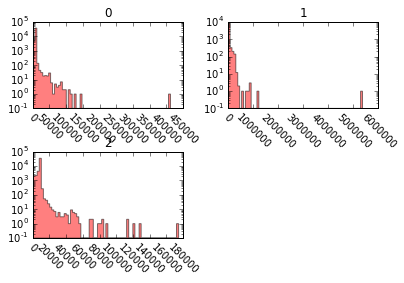

In [10]:
skewbins2 = [-5.,-0.07, 0.07, 5] #TODO: anziche' -5 e +5, mettere min_skew e max_skew
df['skewbin2'] = pd.cut(df.TRK_SKEW, skewbins2, labels=False)
#df.hist('TRK_SKEW', by='skewbin2', bins=30, xrot=-45., histtype='stepfilled', alpha=0.5, color='g') #, log=True)
df.hist('TRK_PI', grid=True, by='skewbin2', bins=70, xrot=-45., log=True, histtype='stepfilled', alpha=0.5, color='r')
#df.hist('eventID', by='skewbin', bins=81)

## 7. Final result: merge PI and skewness CUTS to $\varphi$ distribution

In the following plots, the events belonging to the 2nd and 3rd PI range (> 8000 PI) and the events belonging to the central skewness bin ([-0.05, 0.05]) are cut from the $\varphi$ distribution.

N.B.: is it correct to use the skewness cut? It deletes a lot of events... The PI cut seems to be "softer".

Outcome: the BUMPS are no more present $\rightarrow$ their events belong to populations characterized by high total track pulse height (measured in PI) and/or 

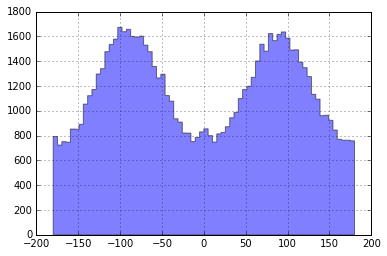

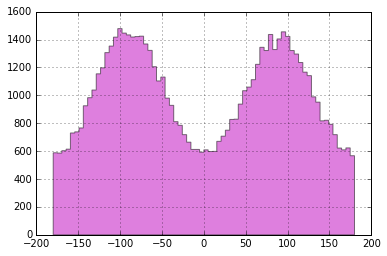

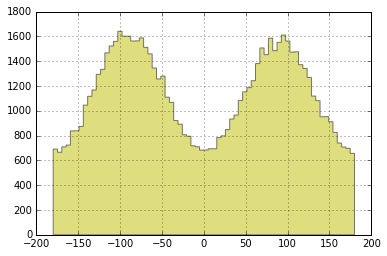

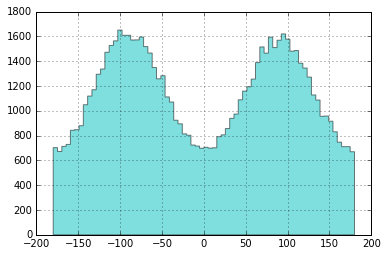

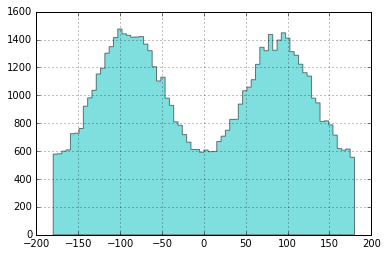

In [16]:
#FINAL RESULTS: MERGE TRK_SKEW AND TRK_PI CUTS
index1 = np.where((df['TRK_SKEW']<-0.07)|(df['TRK_SKEW']>0.07))[0]

#index1 = np.where((df['TRK_SKEW']<-0.07)&(df['TRK_SKEW']>0.07)[0]

index2 = np.where(df['TRK_PI']<8000)[0]
ind_tot = np.union1d(index1, index2)

indtot = np.where((df['TRK_SKEW']<-0.07)|(df['TRK_SKEW']>0.07)&(df['TRK_PI']<8000))[0]

#NO CUT (BLUE)
df['TRK_PHI2'].hist(bins=70, histtype='stepfilled', alpha=0.5)
plt.figure()

#SKEWNESS CUT (MAGENTA)
df['TRK_PHI2'][index1].hist(bins=70, histtype='stepfilled', alpha=0.5, color='m')
plt.figure()

#PI CUT (YELLOW)
df['TRK_PHI2'][index2].hist(bins=70, histtype='stepfilled', alpha=0.5, color='y')
plt.figure()

#SKEWNESS + PI CUTS (CYAN)
df['TRK_PHI2'][ind_tot].hist(bins=70, histtype='stepfilled', alpha=0.5, color='c')
plt.figure()

#SKEWNESS + PI CUTS (CYAN)
df['TRK_PHI2'][indtot].hist(bins=70, histtype='stepfilled', alpha=0.5, color='c')
plt.figure()